In [1]:
from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt
from utils.rodents_routine import params_to_J_scalar, params_to_P_scalar, params_to_w_scalar

import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 16})
sns.set(font_scale=1.5)

In [3]:
path = r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/results/backprop1000NewLossFunctionHeterFFLimitedRange"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [4]:
data = []
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
            if line[:9] == "heter_ff:":
                heter_ff = eval(line.strip().split(' ')[-1])[0]
        datum = {"J EE": params_to_J_scalar(J_array[0]), 
                 "J EI": params_to_J_scalar(J_array[1]), 
                 "J IE": params_to_J_scalar(J_array[2]),
                 "J II": params_to_J_scalar(J_array[3]),
                 "P EE": params_to_P_scalar(P_array[0]),
                 "P EI": params_to_P_scalar(P_array[1]),
                 "P IE": params_to_P_scalar(P_array[2]),
                 "P II": params_to_P_scalar(P_array[3]),
                 "w EE": params_to_w_scalar(w_array[0]),
                 "w EI": params_to_w_scalar(w_array[1]),
                 "w IE": params_to_w_scalar(w_array[2]),
                 "w II": params_to_w_scalar(w_array[3]),
                 "heter_ff": heter_ff,
                 "loss": loss}
        
        data.append(datum)

In [14]:
df = pd.DataFrame(data)
print(len(df))
for datum in data[:5]:
    print(datum)
df.head()

33
{'J EE': 4.752517245696995, 'J EI': 4.000529181834275, 'J IE': 16.371895974673812, 'J II': 13.431256503327326, 'P EE': 0.007944127760178707, 'P EI': 0.5822668314396163, 'P IE': 0.019367380481920604, 'P II': 0.41668785726819246, 'w EE': 88.45645700560922, 'w EI': 23.604254664153668, 'w IE': 81.12288910496689, 'w II': 85.98879384208338, 'heter_ff': 0.626748, 'loss': 0.023086857050657272}
{'J EE': 0.4514326893162704, 'J EI': 18.333945453233287, 'J IE': 19.69442541161284, 'J II': 4.03899713162649, 'P EE': 0.024018342645160055, 'P EI': 0.017210289285743845, 'P IE': 0.04377013092484756, 'P II': 0.027192071898883428, 'w EE': 10.615611779758343, 'w EI': 4.3767350873538495, 'w IE': 14.519058843738032, 'w II': 48.523271574012504, 'heter_ff': 0.327988, 'loss': 0.015612076967954636}
{'J EE': 19.40868095163036, 'J EI': 18.940964076567607, 'J IE': 18.079607407250993, 'J II': 19.998793922634373, 'P EE': 0.5921693412084266, 'P EI': 0.3995725480188319, 'P IE': 0.5928983793589999, 'P II': 0.599812868

,J EE,J EI,J IE,J II,P EE,P EI,P IE,P II,w EE,w EI,w IE,w II,heter_ff,loss
0,4.752517,4.000529,16.371896,13.431257,0.007944,0.582267,0.019367,0.416688,88.456457,23.604255,81.122889,85.988794,0.626748,0.023087
1,0.451433,18.333945,19.694425,4.038997,0.024018,0.017210,0.043770,0.027192,10.615612,4.376735,14.519059,48.523272,0.327988,0.015612
2,19.408681,18.940964,18.079607,19.998794,0.592169,0.399573,0.592898,0.599813,6.896378,87.123310,13.908317,87.638616,0.161305,0.012841
3,0.263344,0.708411,0.488474,4.716690,0.538395,0.394758,0.580771,0.524843,9.854443,85.378575,66.807338,47.310157,0.523166,0.020204
4,0.451433,18.333945,19.694425,4.038997,0.024018,0.017210,0.043770,0.027192,10.615612,4.376735,14.519059,48.523272,0.327988,0.015612


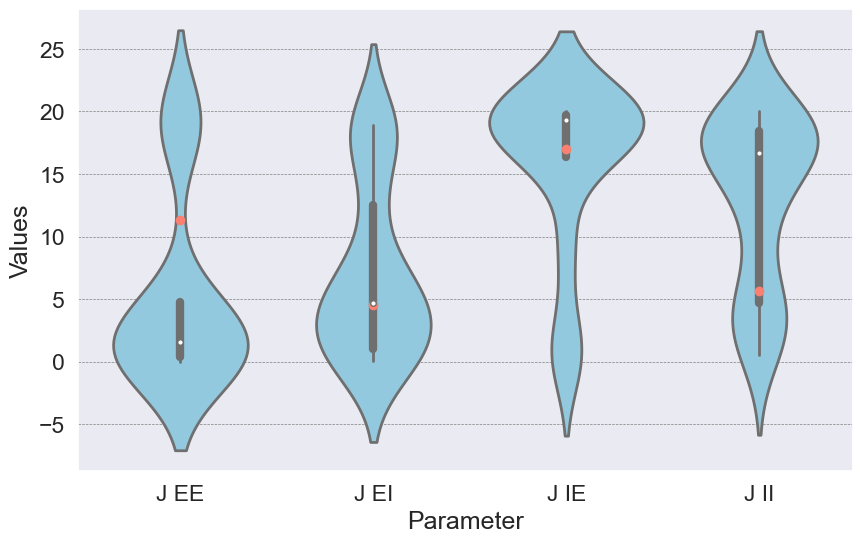

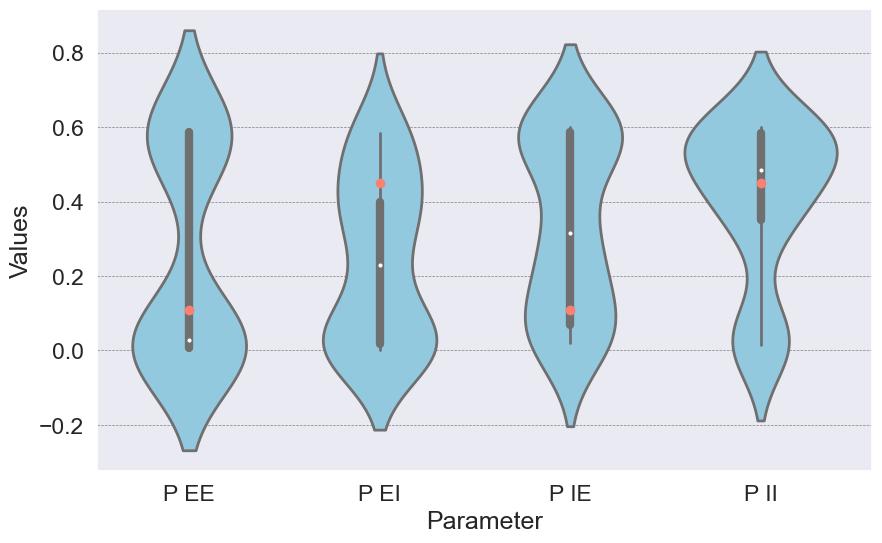

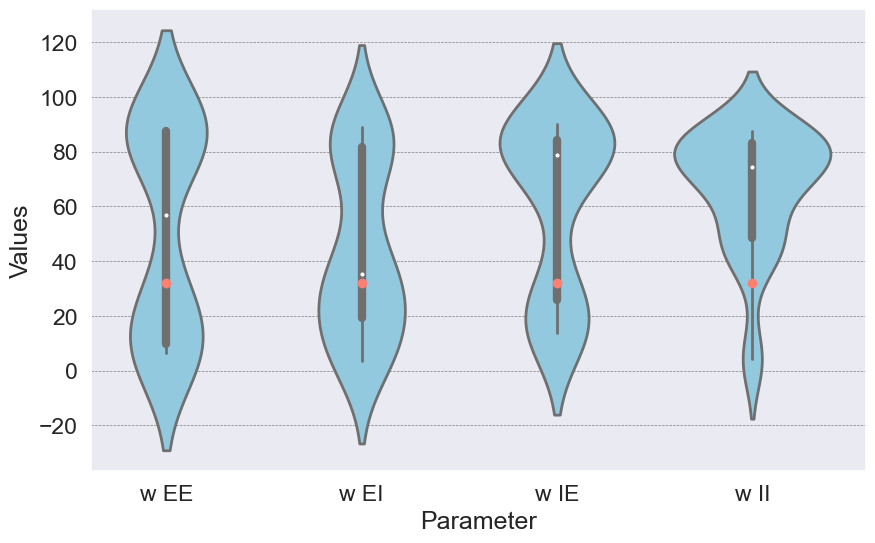

In [6]:
width = 0.8
linewidth=2

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["J EE", "J EI", "J IE", "J II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31, 4.52, 16.97, 5.66]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["P EE", "P EI", "P IE", "P II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["w EE", "w EI", "w IE", "w II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

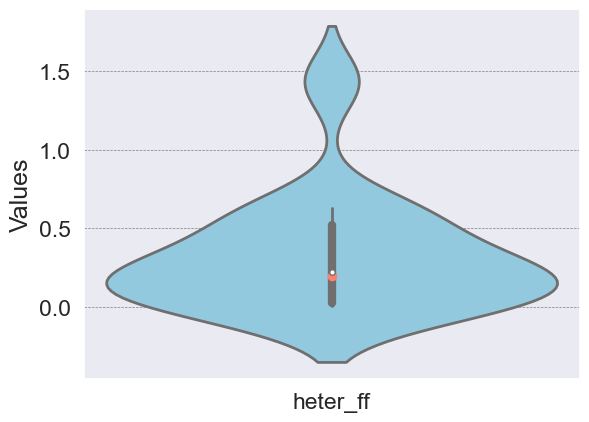

In [7]:
ax = sns.violinplot(data=df[["heter_ff"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
ground_truths = [0.2]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

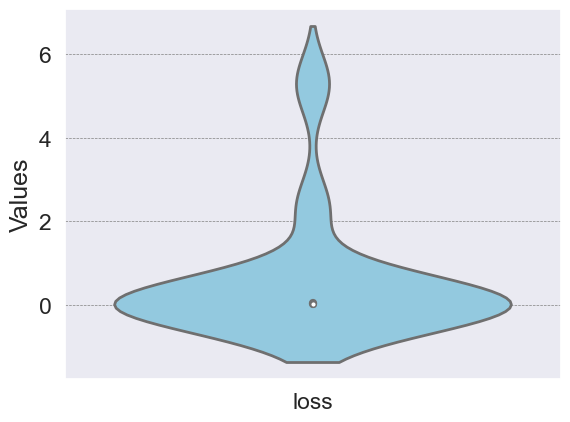

In [8]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

In [9]:
# remove the data with only low loss

data = []
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
            if line[:9] == "heter_ff:":
                    heter_ff = eval(line.strip().split(' ')[-1])[0]
        datum = {"J EE": params_to_J_scalar(J_array[0]), 
                 "J EI": params_to_J_scalar(J_array[1]), 
                 "J IE": params_to_J_scalar(J_array[2]),
                 "J II": params_to_J_scalar(J_array[3]),
                 "P EE": params_to_P_scalar(P_array[0]),
                 "P EI": params_to_P_scalar(P_array[1]),
                 "P IE": params_to_P_scalar(P_array[2]),
                 "P II": params_to_P_scalar(P_array[3]),
                 "w EE": params_to_w_scalar(w_array[0]),
                 "w EI": params_to_w_scalar(w_array[1]),
                 "w IE": params_to_w_scalar(w_array[2]),
                 "w II": params_to_w_scalar(w_array[3]),
                 "heter_ff": heter_ff,
                 "loss": loss}
        if loss < 0.04:
            data.append(datum)

In [10]:
df = pd.DataFrame(data)
for datum in data[:5]:
    print(datum)
df.head()

{'J EE': 4.752517245696995, 'J EI': 4.000529181834275, 'J IE': 16.371895974673812, 'J II': 13.431256503327326, 'P EE': 0.007944127760178707, 'P EI': 0.5822668314396163, 'P IE': 0.019367380481920604, 'P II': 0.41668785726819246, 'w EE': 88.45645700560922, 'w EI': 23.604254664153668, 'w IE': 81.12288910496689, 'w II': 85.98879384208338, 'heter_ff': 0.626748, 'loss': 0.023086857050657272}
{'J EE': 0.4514326893162704, 'J EI': 18.333945453233287, 'J IE': 19.69442541161284, 'J II': 4.03899713162649, 'P EE': 0.024018342645160055, 'P EI': 0.017210289285743845, 'P IE': 0.04377013092484756, 'P II': 0.027192071898883428, 'w EE': 10.615611779758343, 'w EI': 4.3767350873538495, 'w IE': 14.519058843738032, 'w II': 48.523271574012504, 'heter_ff': 0.327988, 'loss': 0.015612076967954636}
{'J EE': 19.40868095163036, 'J EI': 18.940964076567607, 'J IE': 18.079607407250993, 'J II': 19.998793922634373, 'P EE': 0.5921693412084266, 'P EI': 0.3995725480188319, 'P IE': 0.5928983793589999, 'P II': 0.599812868795

,J EE,J EI,J IE,J II,P EE,P EI,P IE,P II,w EE,w EI,w IE,w II,heter_ff,loss
0,4.752517,4.000529,16.371896,13.431257,0.007944,0.582267,0.019367,0.416688,88.456457,23.604255,81.122889,85.988794,0.626748,0.023087
1,0.451433,18.333945,19.694425,4.038997,0.024018,0.017210,0.043770,0.027192,10.615612,4.376735,14.519059,48.523272,0.327988,0.015612
2,19.408681,18.940964,18.079607,19.998794,0.592169,0.399573,0.592898,0.599813,6.896378,87.123310,13.908317,87.638616,0.161305,0.012841
3,0.263344,0.708411,0.488474,4.716690,0.538395,0.394758,0.580771,0.524843,9.854443,85.378575,66.807338,47.310157,0.523166,0.020204
4,0.451433,18.333945,19.694425,4.038997,0.024018,0.017210,0.043770,0.027192,10.615612,4.376735,14.519059,48.523272,0.327988,0.015612


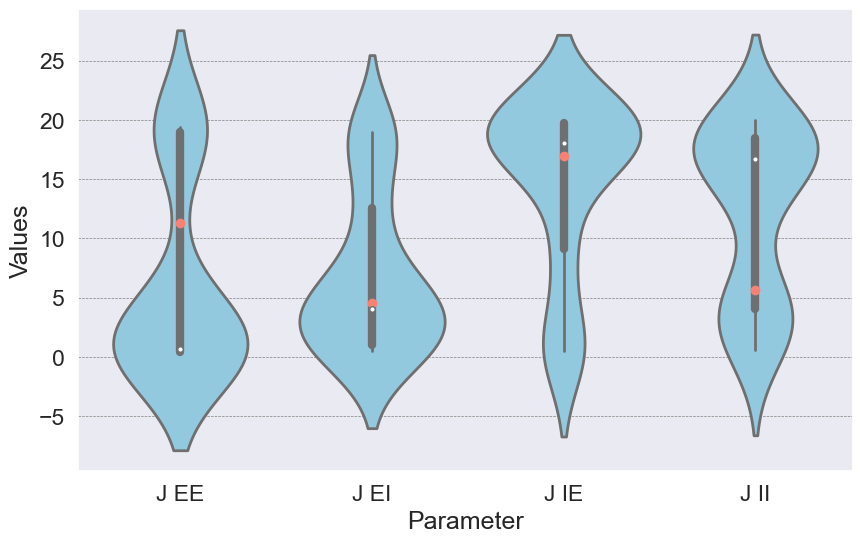

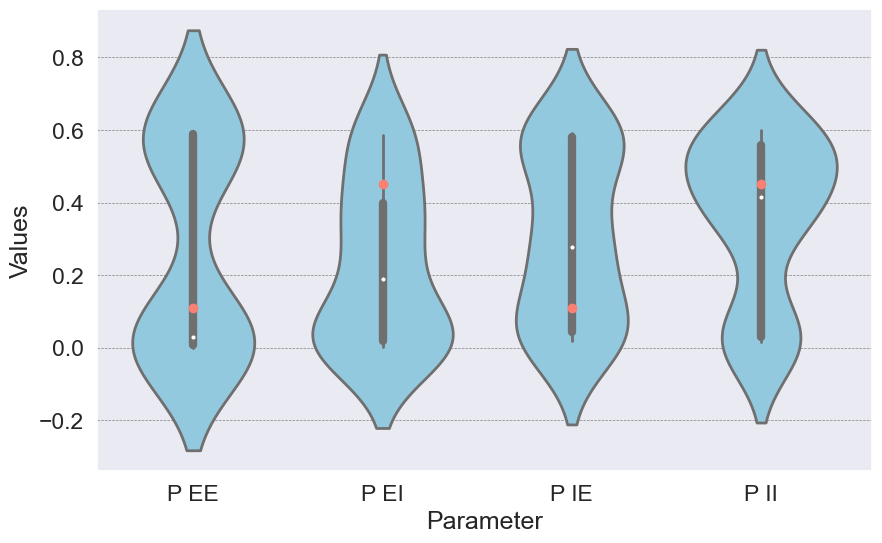

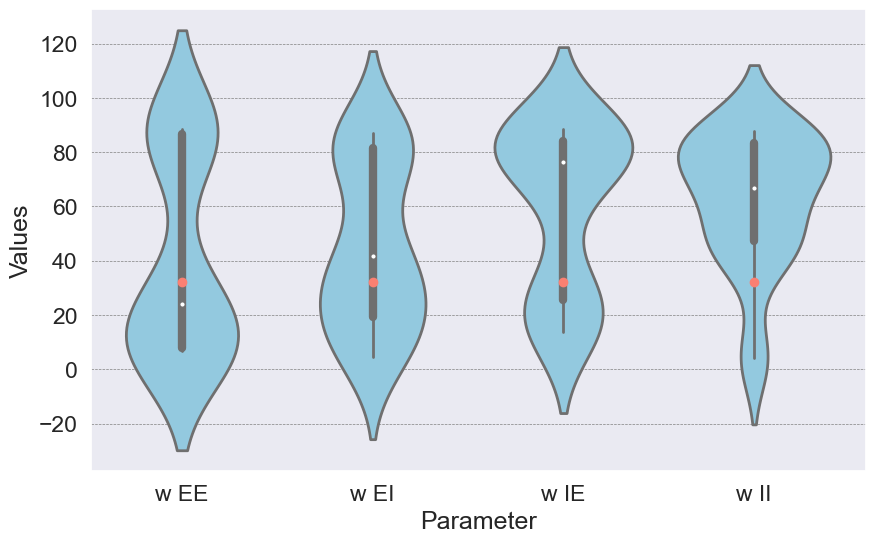

In [11]:
width = 0.8
linewidth=2

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["J EE", "J EI", "J IE", "J II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31, 4.52, 16.97, 5.66]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["P EE", "P EI", "P IE", "P II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["w EE", "w EI", "w IE", "w II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

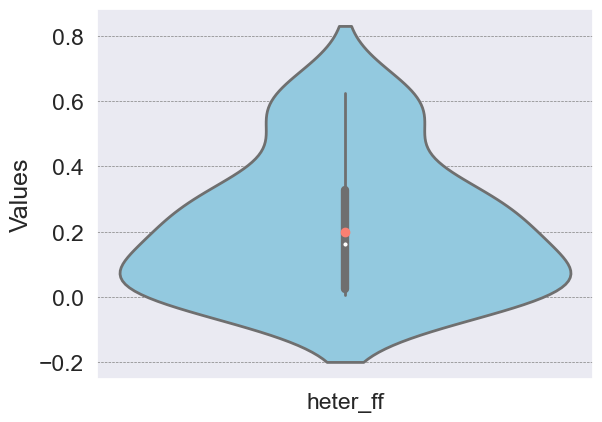

In [12]:
ax = sns.violinplot(data=df[["heter_ff"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
ground_truths = [0.2]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

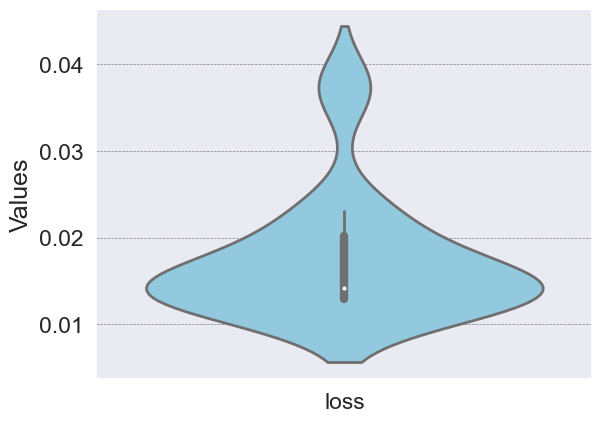

In [13]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()